<a href="https://colab.research.google.com/github/MarceloMouraF/interesting_codes/blob/main/Cruzar_Planilhas_com_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd

In [115]:
# Montar o acesso ao nosso Google drive, assim podemos salvar e acessar dados diretamente de lá
from google.colab import drive

drive.mount('/content/drive', force_remount=True) # force é para caso seja rodado de novo ele não dê erro
#aceitar o acesso ao drive

Mounted at /content/drive


In [2]:
#Pegar o estado do car

def pegar_uf(car):
    uf = car[:2]
    return uf

In [4]:
df_terra = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Planilhas/Base ProTerra_unicos_v2.xlsx')

In [5]:
#aplica a função de pegar estado na coluna do car
df_terra['uf'] = df_terra['CAR'].apply(pegar_uf)

In [6]:
#retorna os valores únicos da coluna uf
df_terra['uf'].unique()

array(['MT', 'MS', 'AG'], dtype=object)

In [8]:
df_terra.head()

Ano Safra  Contrato Master                                  Parceiro  \
0       2023       1000197794                    AGRICOLA ALVORADA S.A.   
1       2023       1000197794                    AGRICOLA ALVORADA S.A.   
2       2023       1000250901                      ALDUIR JOSE CENEDESE   
3       2023       1000242839                      ROBERTO PEDRO TONIAL   
4       2023       1000199607  COOPERATIVA AGROPECUARIA E INDUSTRIAL CE   

         Faz CNPJ      Faz CPF  Cidade do Parceiro Faz Estado  \
0  04854422000185            #  PRIMAVERA DO LESTE      BR/MT   
1  04854422000185            #  PRIMAVERA DO LESTE      BR/MT   
2               #  34015876172          NOVA MUTUM      BR/MT   
3               #  22938699034              SONORA      BR/MS   
4  07572351000116            #             SORRISO      BR/MT   

                   UF              Cidade  \
0         Mato Grosso  PRIMAVERA DO LESTE   
1         Mato Grosso  PRIMAVERA DO LESTE   
2         Mato Grosso          NOVA MUTUM   
3  Mato Grosso do Sul              SONORA   
4         Mato Grosso             SORRISO   

                                           CAR  uf  
0  MT-5103858-6B44C556CC4F47F688437DF306C7A537  MT  
1  MT-5103858-7266FE90D714412C8C3E20002A0421B9  MT  
2  MT-5106224-E4C1BD92A8D54E5E85E0777D4E4F9AB7  MT  
3  MS-5007935-D86FEF0A4E754898B76C4847D3DF9C24  MS  
4  MT-5107925-B4BA61F0EFA44189ABBAE14D1ECA6FB5  MT

In [7]:
# Carregar o shape do estado do CAR
mt = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/CAR_MT_com_grid.shp')
#sc = gpd.read_file(r'sicar\final\SC.shp')

In [ ]:
#concatena os dois shapes
#gdfzawn = pd.concat([sc,pr])

In [9]:
#Junta o shape com o excel a partir da coluna código
dffinal_t = pd.merge(df_terra.rename(columns={'CAR':'codigo'}),mt,how='left',on='codigo')

In [10]:
#Exibe as informações de cada coluna
dffinal_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Ano Safra           93 non-null     int64   
 1   Contrato Master     93 non-null     int64   
 2   Parceiro            93 non-null     object  
 3   Faz CNPJ            93 non-null     object  
 4   Faz CPF             93 non-null     object  
 5   Cidade do Parceiro  93 non-null     object  
 6   Faz Estado          93 non-null     object  
 7   UF                  93 non-null     object  
 8   Cidade              93 non-null     object  
 9   codigo              93 non-null     object  
 10  uf_x                93 non-null     object  
 11  situacao            87 non-null     object  
 12  condicao            87 non-null     object  
 13  uf_y                87 non-null     object  
 14  nome_munic          87 non-null     object  
 15  id_municip          87 non-null     float6

In [12]:
dffinal_t.head(3)

Ano Safra  Contrato Master                Parceiro        Faz CNPJ  \
0       2023       1000197794  AGRICOLA ALVORADA S.A.  04854422000185   
1       2023       1000197794  AGRICOLA ALVORADA S.A.  04854422000185   
2       2023       1000250901    ALDUIR JOSE CENEDESE               #   

       Faz CPF  Cidade do Parceiro Faz Estado           UF  \
0            #  PRIMAVERA DO LESTE      BR/MT  Mato Grosso   
1            #  PRIMAVERA DO LESTE      BR/MT  Mato Grosso   
2  34015876172          NOVA MUTUM      BR/MT  Mato Grosso   

               Cidade                                       codigo  ...  \
0  PRIMAVERA DO LESTE  MT-5103858-6B44C556CC4F47F688437DF306C7A537  ...   
1  PRIMAVERA DO LESTE  MT-5103858-7266FE90D714412C8C3E20002A0421B9  ...   
2          NOVA MUTUM  MT-5106224-E4C1BD92A8D54E5E85E0777D4E4F9AB7  ...   

                                            condicao uf_y       nome_munic  \
0                                         Em análise   MT  Gaúcha do Norte   
1  Aguardando análise, não passível de revisão de...   MT  Gaúcha do Norte   
2  Aguardando análise, não passível de revisão de...   MT       Nova Mutum   

  id_municip modulo_fis  tipo  area_ha       cep   nome  \
0  5103858.0      23.93   IRU   2151.7  78875000  BG125   
1  5103858.0       2.71   IRU    243.6  78875000  BF126   
2  5106224.0      82.79   IRU   8283.2  78450000  BG120   

                                            geometry  
0  POLYGON ((-53.44720 -13.25552, -53.44664 -13.2...  
1  POLYGON ((-53.21894 -13.09053, -53.21511 -13.0...  
2  POLYGON ((-55.96310 -13.37944, -55.96330 -13.3...  

[3 rows x 22 columns]

In [15]:
dffinal_t.columns

Index(['Ano Safra', 'Contrato Master', 'Parceiro', 'Faz CNPJ', 'Faz CPF',
       'Cidade do Parceiro', 'Faz Estado', 'UF', 'Cidade', 'codigo', 'uf_x',
       'situacao', 'condicao', 'uf_y', 'nome_munic', 'id_municip',
       'modulo_fis', 'tipo', 'area_ha', 'cep', 'nome', 'geometry'],
      dtype='object')

In [16]:
#seleciona colunas específicas
dffinal_t = dffinal_t[['codigo','situacao','area_ha','Ano Safra','Contrato Master','Parceiro','Faz CNPJ','Faz CPF','Cidade do Parceiro','Cidade','tipo'
,'uf_x','nome','geometry']]
#renomeia a coluna
dffinal_t = dffinal_t.rename(columns={'uf_x':'uf'})

In [17]:
dffinal_t.head(3)

codigo situacao  area_ha  Ano Safra  \
0  MT-5103858-6B44C556CC4F47F688437DF306C7A537       AT   2151.7       2023   
1  MT-5103858-7266FE90D714412C8C3E20002A0421B9       AT    243.6       2023   
2  MT-5106224-E4C1BD92A8D54E5E85E0777D4E4F9AB7       AT   8283.2       2023   

   Contrato Master                Parceiro        Faz CNPJ      Faz CPF  \
0       1000197794  AGRICOLA ALVORADA S.A.  04854422000185            #   
1       1000197794  AGRICOLA ALVORADA S.A.  04854422000185            #   
2       1000250901    ALDUIR JOSE CENEDESE               #  34015876172   

   Cidade do Parceiro              Cidade tipo  uf   nome  \
0  PRIMAVERA DO LESTE  PRIMAVERA DO LESTE  IRU  MT  BG125   
1  PRIMAVERA DO LESTE  PRIMAVERA DO LESTE  IRU  MT  BF126   
2          NOVA MUTUM          NOVA MUTUM  IRU  MT  BG120   

                                            geometry  
0  POLYGON ((-53.44720 -13.25552, -53.44664 -13.2...  
1  POLYGON ((-53.21894 -13.09053, -53.21511 -13.0...  
2  POLYGON ((-55.96310 -13.37944, -55.96330 -13.3...

In [18]:
#transforma o dataframe em geodataframe
gdffinal_t = gpd.GeoDataFrame(dffinal_t,geometry='geometry',crs='epsg:4674')

In [ ]:
#Transforma coluna em string
#gdffinal['Prazo'] = gdffinal['Prazo'].astype('str')
#gdffinal['Recebimento'] = gdffinal['Recebimento'].astype('str')

In [20]:
gdffinal_t.shape

(93, 14)

In [21]:
gdffinal_t.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/BaseProTerra.shp')

<ipython-input-21-70ecdfb56c15>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdffinal_t.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/BaseProTerra.shp')


<Axes: >

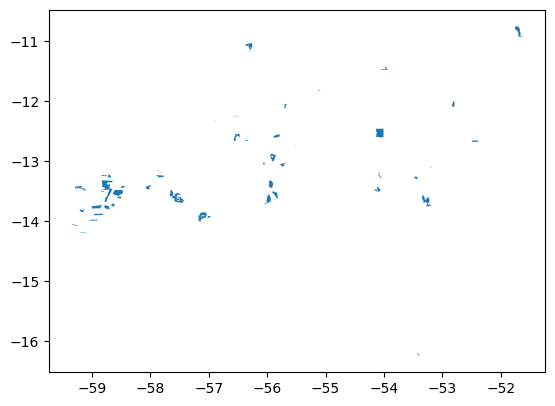

In [22]:
gdffinal_t.plot()

#*Agora fazer a mesma coisa para a outra base e, se der, ver se tem CAR's iguais!*

In [116]:
df_2bs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Planilhas/Base_2BSvs_limpa_v2.xlsx')

In [82]:
df_2bs.head(1)

Controle Nome do Fornecedor Alteração- Produtor       Nome da Fazenda  \
0         1  ADAIR VENDRUSCOLO   ADAIR VENDRUSCOLO  Fazenda Porta do Céu   

  Análise de Risco  Data Analise de Risco      CNPJ/CPF  \
0         APROVADO                   2016  142420280-91   

                  Endereço / Localização (CAR)  UF Produto  \
0  MT-5106224-39BA926191FE48A98E566C62F16D926C  MT    SOJA   

   Área Cultivada (ha)  Quantidade de soja Potencial (t/ano) Comentarios  
0            1032.8389                           3857.653292         NaN

In [43]:
#df_2bs['Endereço / Localização (CAR)'].dtype
# que merda de type é esse? = dtype('O')

array(['MT-5106224-39BA926191FE48A98E566C62F16D926C',
       'MT-5107065-FBDF698F39D740B1B456829489E23DEA',
       'MT-5107065-C5547CB906EA42C8905C6000B9F78836', ...,
       'MT-5102686-8B66FBFF1D3944BC837A0E5FE05D5539',
       'MT-5106752-50206030A6484B1392956AB4A72D5247',
       'MT-5106307-85BE7A19DC554612B82F23C912A6B8F0'], dtype=object)

In [156]:
# Criar uma nova coluna com os dados da coluna Endereço / Localização (CAR) em formato string
df_2bs['CAR']=df_2bs['Endereço / Localização (CAR)'].apply(str) # criando coluna CAR que será populada com Endereço / Localização (CAR)
                                                        #convertidos para valores string - texto
# OBRIGADO ChatGPT!

In [161]:
# Tirar pontos do meio dos CAR / substituir por "vazio"
df_2bs['CAR'] = df_2bs['CAR'].astype(str).str.replace('.', '')

<ipython-input-161-406627508446>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2bs['CAR'] = df_2bs['CAR'].astype(str).str.replace('.', '')


In [158]:
df_2bs.head(2)

Controle Nome do Fornecedor Alteração- Produtor       Nome da Fazenda  \
0         1  ADAIR VENDRUSCOLO   ADAIR VENDRUSCOLO  Fazenda Porta do Céu   
1         2   ADALBERTO BACKES    ADALBERTO BACKES   Fazenda São Matheus   

   Data Analise de Risco      CNPJ/CPF  Unnamed: 6  \
0                   2016  142420280-91         NaN   
1                   2017  492767510-68         NaN   

                  Endereço / Localização (CAR)  UF Produto  \
0  MT-5106224-39BA926191FE48A98E566C62F16D926C  MT    SOJA   
1  MT-5107065-FBDF698F39D740B1B456829489E23DEA  MT    SOJA   

   Área Cultivada (ha)  Quantidade de soja Potencial (t/ano) Comentarios  \
0            1032.8389                           3857.653292         NaN   
1             592.2200                           2211.941700         NaN   

                                           CAR  uf  
0  MT-5106224-39BA926191FE48A98E566C62F16D926C  MT  
1  MT-5107065-FBDF698F39D740B1B456829489E23DEA  MT

In [162]:
#aplica a função de pegar estado na coluna do car
df_2bs['uf'] = df_2bs['CAR'].apply(pegar_uf)

In [163]:
#retorna os valores únicos da coluna uf
df_2bs['uf'].unique()

array(['MT', '19', '81', '27', '13', '94', '10', '14', '56', '12', '31',
       '47', '80', '95', '96', '16', '17', '75', '23', '89', '25', '28',
       '42', '32', '41', '73', '87', '45', '43', '18', '77', '15', '11',
       '21', '63', '22', '78'], dtype=object)

In [ ]:
# Carregar o shape do estado do CAR
#mt = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/CAR_MT_com_grid.shp')
#sc = gpd.read_file(r'sicar\final\SC.shp')

In [164]:
# Selecionar o que só é MT, tirar esses números estranhos
df_2bs=df_2bs[df_2bs.uf=='MT']

In [165]:
df_2bs['uf'].unique()

array(['MT'], dtype=object)

In [166]:
df_2bs.shape

(1024, 15)

In [167]:
#Junta o shape com o excel a partir da coluna código
dffinal_bs = pd.merge(df_2bs.rename(columns={'CAR':'codigo'}),mt,how='left',on='codigo')

In [168]:
#Exibe as informações de cada coluna
dffinal_bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Controle                              1024 non-null   int64   
 1   Nome do Fornecedor                    1024 non-null   object  
 2   Alteração- Produtor                   1024 non-null   object  
 3   Nome da Fazenda                       1024 non-null   object  
 4   Data Analise de Risco                 1024 non-null   int64   
 5   CNPJ/CPF                              1024 non-null   object  
 6   Unnamed: 6                            0 non-null      float64 
 7   Endereço / Localização (CAR)          1024 non-null   object  
 8   UF                                    1024 non-null   object  
 9   Produto                               1024 non-null   object  
 10  Área Cultivada (ha)                   1016 non-null   float64 
 11  Quan

#**Não foram encontrados 4 CAR's dos encontraveis**

In [169]:
dffinal_bs.head(3)

Controle Nome do Fornecedor Alteração- Produtor  \
0         1  ADAIR VENDRUSCOLO   ADAIR VENDRUSCOLO   
1         2   ADALBERTO BACKES    ADALBERTO BACKES   
2         3   Adalberto Backes    ADALBERTO BACKES   

                             Nome da Fazenda  Data Analise de Risco  \
0                       Fazenda Porta do Céu                   2016   
1                        Fazenda São Matheus                   2017   
2  Fazenda Santo Antônio - Lotes 116 e 116 A                   2017   

       CNPJ/CPF  Unnamed: 6                 Endereço / Localização (CAR)  UF  \
0  142420280-91         NaN  MT-5106224-39BA926191FE48A98E566C62F16D926C  MT   
1  492767510-68         NaN  MT-5107065-FBDF698F39D740B1B456829489E23DEA  MT   
2  492767510-68         NaN  MT-5107065-C5547CB906EA42C8905C6000B9F78836  MT   

  Produto  ...                                           condicao  uf_y  \
0    SOJA  ...  Analisado, aguardando regularização ambiental ...    MT   
1    SOJA  ...  Aguardando análise, não passível de revisão de...    MT   
2    SOJA  ...  Aguardando análise, não passível de revisão de...    MT   

   nome_munic id_municip modulo_fis tipo area_ha       cep   nome  \
0  Nova Mutum  5106224.0      13.39  IRU  1340.4  78450000  BG118   
1   Querência  5107065.0       8.66  IRU   692.9  78643000  BE128   
2   Querência  5107065.0       6.05  IRU   484.1  78643000  BE128   

                                            geometry  
0  POLYGON ((-56.40307 -13.27481, -56.40306 -13.2...  
1  POLYGON ((-52.15425 -12.44207, -52.15674 -12.4...  
2  POLYGON ((-52.09464 -12.39115, -52.09523 -12.3...  

[3 rows x 26 columns]

In [170]:
# Seleciona apenas as feições com geometrias não nulas
df_bs_not_null=dffinal_bs[dffinal_bs['geometry'].notna()]


###### non-null
###### gdf_not_null = gdf[gdf['geometry'].notna()]
######gdf_not_null = gdf.dropna(subset=['geometry'])

In [171]:
df_bs_not_null.columns

Index(['Controle', 'Nome do Fornecedor', 'Alteração- Produtor',
       'Nome da Fazenda', 'Data Analise de Risco', 'CNPJ/CPF', 'Unnamed: 6',
       'Endereço / Localização (CAR)', 'UF', 'Produto', 'Área Cultivada (ha)',
       'Quantidade de soja Potencial (t/ano)', 'Comentarios', 'codigo', 'uf_x',
       'situacao', 'condicao', 'uf_y', 'nome_munic', 'id_municip',
       'modulo_fis', 'tipo', 'area_ha', 'cep', 'nome', 'geometry'],
      dtype='object')

In [94]:
#dffinal_bs.shape

(1024, 26)

In [172]:
#seleciona colunas específicas
df_bs_not_null = df_bs_not_null[['codigo','situacao','area_ha','Controle','Nome do Fornecedor',
                         'Data Analise de Risco','CNPJ/CPF','Produto','uf_x','nome','geometry']]
#renomeia a coluna
df_bs_not_null = df_bs_not_null.rename(columns={'uf':'uf'})

In [173]:
df_bs_not_null.columns

Index(['codigo', 'situacao', 'area_ha', 'Controle', 'Nome do Fornecedor',
       'Data Analise de Risco', 'CNPJ/CPF', 'Produto', 'uf_x', 'nome',
       'geometry'],
      dtype='object')

In [174]:
df_bs_not_null.head(3)

codigo situacao  area_ha  Controle  \
0  MT-5106224-39BA926191FE48A98E566C62F16D926C       AT   1340.4         1   
1  MT-5107065-FBDF698F39D740B1B456829489E23DEA       AT    692.9         2   
2  MT-5107065-C5547CB906EA42C8905C6000B9F78836       AT    484.1         3   

  Nome do Fornecedor  Data Analise de Risco      CNPJ/CPF Produto uf_x   nome  \
0  ADAIR VENDRUSCOLO                   2016  142420280-91    SOJA   MT  BG118   
1   ADALBERTO BACKES                   2017  492767510-68    SOJA   MT  BE128   
2   Adalberto Backes                   2017  492767510-68    SOJA   MT  BE128   

                                            geometry  
0  POLYGON ((-56.40307 -13.27481, -56.40306 -13.2...  
1  POLYGON ((-52.15425 -12.44207, -52.15674 -12.4...  
2  POLYGON ((-52.09464 -12.39115, -52.09523 -12.3...

In [175]:
#transforma o dataframe em geodataframe
gdffinal_bs = gpd.GeoDataFrame(df_bs_not_null,geometry='geometry',crs='epsg:4674')

In [153]:
# Deixar todas as colunas em string
'''
for coluna in list(gdffinal_bs.columns):
  if coluna != 'geometry':
    gdffinal_bs[coluna]=gdffinal_bs[coluna].astype('str')
'''

In [149]:
'''
tipos_dados = gdffinal_bs.dtypes
if 'object' in tipos_dados.values:
    bytes_columns = tipos_dados[tipos_dados == 'object'].index
    for col in bytes_columns:
        count= 0
        for dado in gdffinal_bs[col]:
            if str(type(dado)) == "<class 'bytes'>":
                #try:
                    print(col)
                    print(count)
                    print(dado)
                #except:
                    #pass
            count+=1
'''

In [176]:
gdffinal_bs.shape

(1020, 11)

In [177]:
gdffinal_bs.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/Base2BSvs.shp')

<ipython-input-177-cc063acd8e0d>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdffinal_bs.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/Base2BSvs.shp')


In [184]:
# Para plotar os dados simples, mas de forma bonita, vamos usar algumas bibliotecas:
!pip install folium -q
!pip installmatplotlib -q
!pip install mapclassify -q

ERROR: unknown command "installmatplotlib"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.1 MB/s eta 0:00:00


In [185]:
gdffinal_bs.explore()

In [197]:
# Outro jeito de plotar é:
# Visualizar o shape
import folium

# Calcular a extensão do shape para centralizar o mapa
center = [gdffinal_bs.centroid.y.mean(), gdffinal_bs.geometry.centroid.x.mean()]

# Criar um mapa do Google Maps com folium
m = folium.Map(location=center, zoom_start=12, tiles='Stamen Terrain')

# Plotar o shape no mapa
folium.GeoJson(gdffinal_bs).add_to(m)

# Exibir o mapa
m

<ipython-input-197-144faa79c042>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdffinal_bs.centroid.y.mean(), gdffinal_bs.geometry.centroid.x.mean()]


#*Verificar se tem CAR's iguais*


In [182]:
gdf_iguais = gdffinal_bs.merge(gdffinal_t, on='codigo')#, suffixes=('_gdf1', '_gdf2'))

In [195]:
# Contar quantos cares tem:
gdf_iguais.shape[0]

print('Tem %s feições iguais nas bases do ProTerra e 2BSvs'%(gdf_iguais.shape[0]))

Tem 13 feições iguais nas bases do ProTerra e 2BSvs
